In [284]:
#develop a classification model -Logistic regression model
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [297]:
df_class_model = pd.read_csv('../data/processed_data/df_delay.csv')

In [298]:
df_class_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17653 entries, 0 to 17652
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        17653 non-null  object 
 1   Time        17653 non-null  object 
 2   Day         17653 non-null  object 
 3   Station     17653 non-null  object 
 4   Code        17653 non-null  object 
 5   Min Delay   17653 non-null  float64
 6   Min Gap     17653 non-null  float64
 7   Bound       17653 non-null  object 
 8   Line        17653 non-null  object 
 9   Month       17653 non-null  int64  
 10  Month Name  17653 non-null  object 
 11  Category    17653 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.6+ MB


In [ ]:
#df_class_model = df.drop(['Month'],axis=1)

In [299]:
 #count isnull values per column
print(df_class_model.isnull().sum())

Date          0
Time          0
Day           0
Station       0
Code          0
Min Delay     0
Min Gap       0
Bound         0
Line          0
Month         0
Month Name    0
Category      0
dtype: int64


In [308]:
df_class_model['Month'] = df_class_model['Month'].astype('object')

In [309]:
#provide concise summary of dataset
df_class_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17653 entries, 0 to 17652
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        17653 non-null  object 
 1   Time        17653 non-null  object 
 2   Day         17653 non-null  object 
 3   Station     17653 non-null  object 
 4   Code        17653 non-null  object 
 5   Min Delay   17653 non-null  float64
 6   Min Gap     17653 non-null  float64
 7   Bound       17653 non-null  object 
 8   Line        17653 non-null  object 
 9   Month       17653 non-null  object 
 10  Month Name  17653 non-null  object 
 11  Category    17653 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.6+ MB


In [310]:
print(df_class_model.head())

         Date   Time     Day                Station   Code  Min Delay  \
0  2024-01-01  00:44  Monday     VAUGHAN MC STATION  MUPAA        0.0   
1  2024-01-01  00:48  Monday          BLOOR STATION    SUO        0.0   
2  2024-01-01  01:10  Monday     VAUGHAN MC STATION    MUO        8.0   
3  2024-01-01  01:11  Monday         DUNDAS STATION    SUO        0.0   
4  2024-01-01  01:38  Monday  ST GEORGE YUS STATION   SUUT        0.0   

   Min Gap Bound Line Month Month Name                           Category  
0      0.0     S   YU     1    January  Door/Passenger/Platform Incidents  
1      0.0     S   YU     1    January                  Security/Policing  
2     14.0     S   YU     1    January                      Miscellaneous  
3      0.0     S   YU     1    January                  Security/Policing  
4      0.0     N   YU     1    January                  Security/Policing  


In [340]:
# Splitting the dataset into training and testing subsets
X = df_class_model.drop(['Date','Min Delay','Station','Code','Time'], axis=1)
y = df_class_model['Min Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features =['Min Gap']
categorical_features = ['Bound','Line','Category','Day','Month']

# Defining transformations for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Defining transformations for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining preprocessing steps for numerical and categorical features
reprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), 
        ('cat', categorical_transformer, categorical_features)]) 


X_train = preprocessor.fit_transform(X_train) 
X_test = preprocessor.transform(X_test)

In [338]:
# Importing the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression
import joblib

# Initializing the Logistic Regression model with a random state for reproducibility
model = LogisticRegression(random_state=42)

# Training (fitting) the Logistic Regression model using the processed training data
model.fit(X_train, y_train)

#saving the trained model  as preprocessor as a serialized files using joblib
joblib.dump(model, 'ttc_delay_logistic_regression_model.joblib')
joblib.dump(preprocessor, 'ttc_delay_preprocessor.joblib')

# Calculating the accuracy of the model on the test dataset
accuracy = model.score(X_test, y_test)
print(accuracy)
 

0.6120079297649391


c:\Users\User\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This means that the model correctly classified approximately as 74.22% of the instances in the test set.

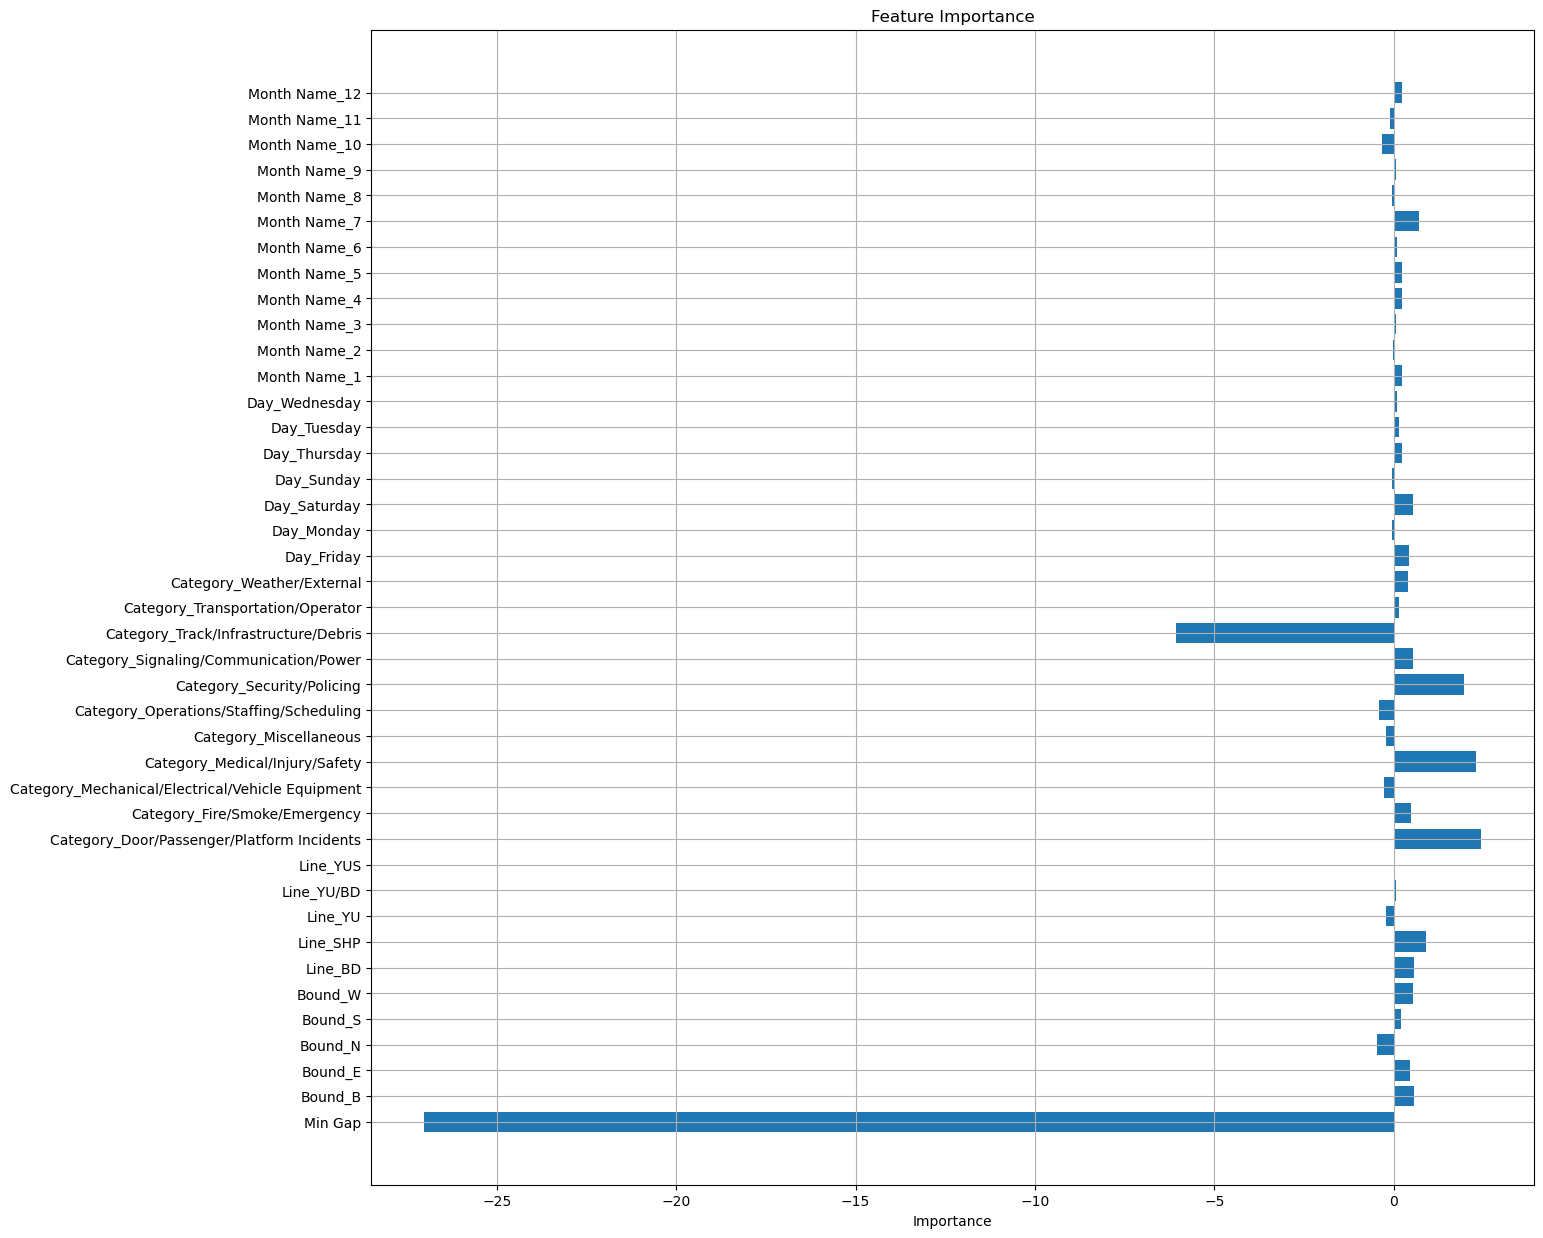

In [339]:
# visualize the importance of the model features 
import matplotlib.pyplot as plt
import numpy as np

importance = model.coef_[0]
features = np.array(numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))

plt.figure(figsize=(15, 15))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.grid(True)
plt.show()